In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout, Reshape, LSTM, TimeDistributed
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical, np_utils
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("A_Z_Handwritten_Data.csv").astype('float32')

In [3]:
X = data.drop('0',axis = 1)
y = data['0']


In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}


C:\Users\Tanaya Pal\AppData\Local\Temp\ipykernel_14064\918752700.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  train_yint = np.int0(y)


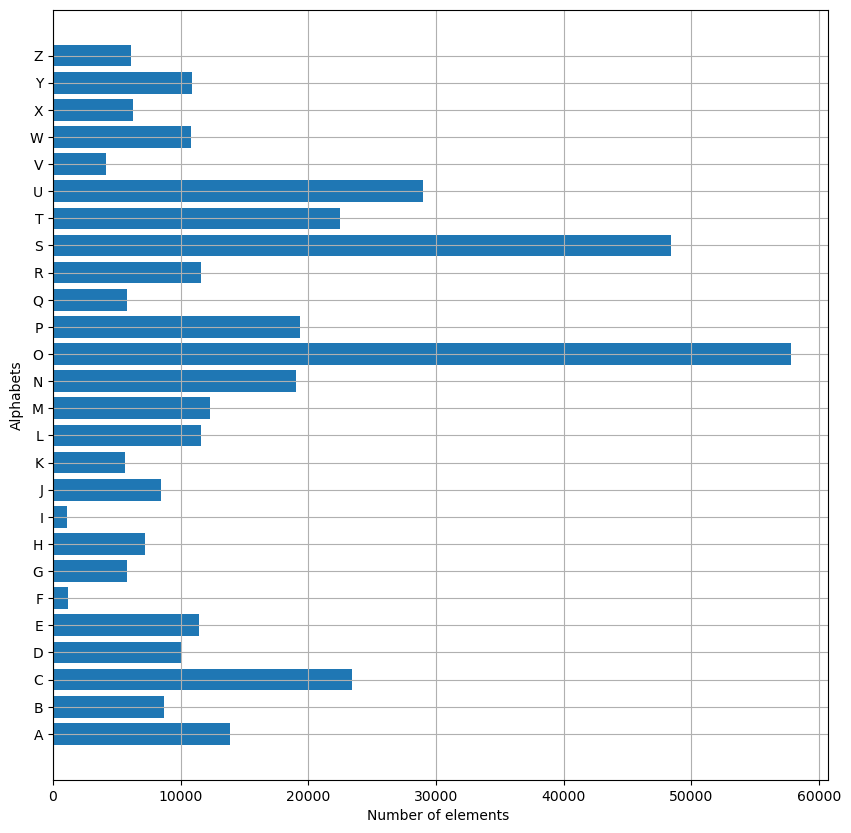

In [6]:
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

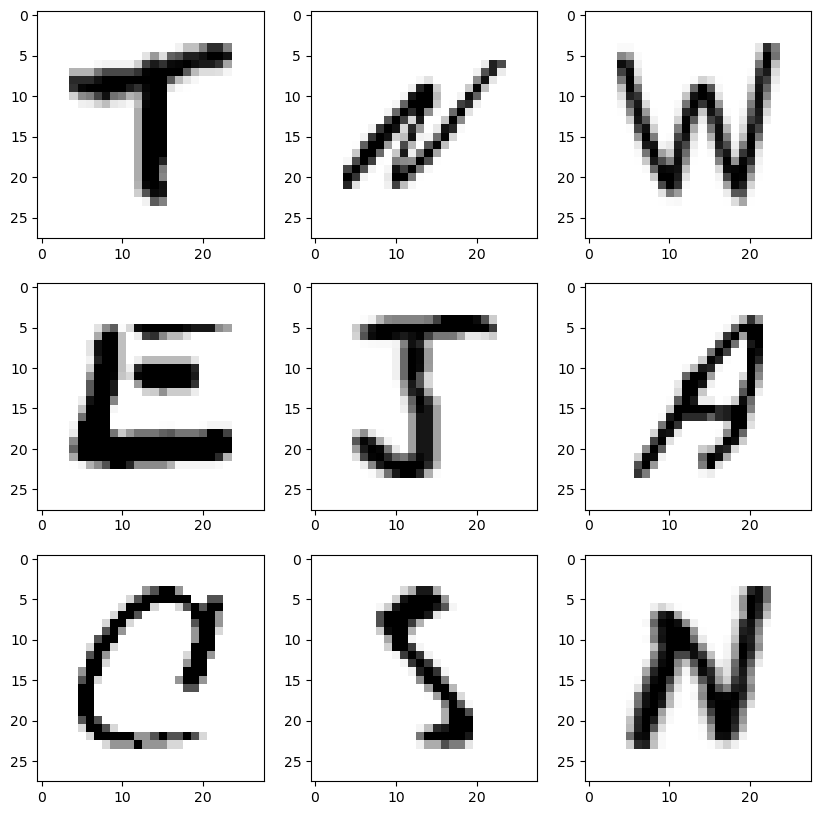

In [7]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()


In [8]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [9]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [10]:



# Assuming you have already defined train_X, train_yOHE, test_X, and test_yOHE

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# Reshape the output of the last convolutional layer to be suitable for the LSTM layer
model.add(Reshape((-1, 128)))

# Add an LSTM layer with return_sequences=True to return the full sequence
model.add(LSTM(64, return_sequences=True, activation='relu'))

# Flatten the output of the LSTM layer before feeding it into the Dense layers
model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))  # Adjust dropout rate based on your needs
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # Adjust dropout rate based on your needs

model.add(Dense(26, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

history = model.fit(train_X, train_yOHE, epochs=5, callbacks=[reduce_lr, early_stop], validation_data=(test_X, test_yOHE))

model.summary()

model.save(r'model_hand.h5')



Epoch 1/5
9312/9312 [==============================] - 234s 24ms/step - loss: 0.2948 - accuracy: 0.9199 - val_loss: 0.0848 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 2/5
9312/9312 [==============================] - 226s 24ms/step - loss: 0.1308 - accuracy: 0.9677 - val_loss: 0.0598 - val_accuracy: 0.9861 - lr: 0.0010
Epoch 3/5
9312/9312 [==============================] - 240s 26ms/step - loss: 0.1049 - accuracy: 0.9739 - val_loss: 0.0591 - val_accuracy: 0.9868 - lr: 0.0010
Epoch 4/5
9312/9312 [==============================] - 227s 24ms/step - loss: 0.0907 - accuracy: 0.9776 - val_loss: 0.0557 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 5/5
9312/9312 [==============================] - 229s 25ms/step - loss: 0.0805 - accuracy: 0.9805 - val_loss: 0.0487 - val_accuracy: 0.9893 - lr: 0.0010
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)      

In [11]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9794066548347473, 0.9861323833465576, 0.9868170022964478, 0.9875419735908508, 0.9892871379852295]
The training accuracy is : [0.9199422597885132, 0.9677406549453735, 0.9739428162574768, 0.9776110649108887, 0.9805074334144592]
The validation loss is : [0.0847674235701561, 0.05984523519873619, 0.0590636171400547, 0.05572129413485527, 0.04866135120391846]
The training loss is : [0.29476603865623474, 0.1307608187198639, 0.10493888705968857, 0.09066030383110046, 0.08050834387540817]


In [12]:
pred = model.predict(test_X[:9])
print(test_X.shape)


1/1 [==============================] - 1s 756ms/step
(74490, 28, 28, 1)


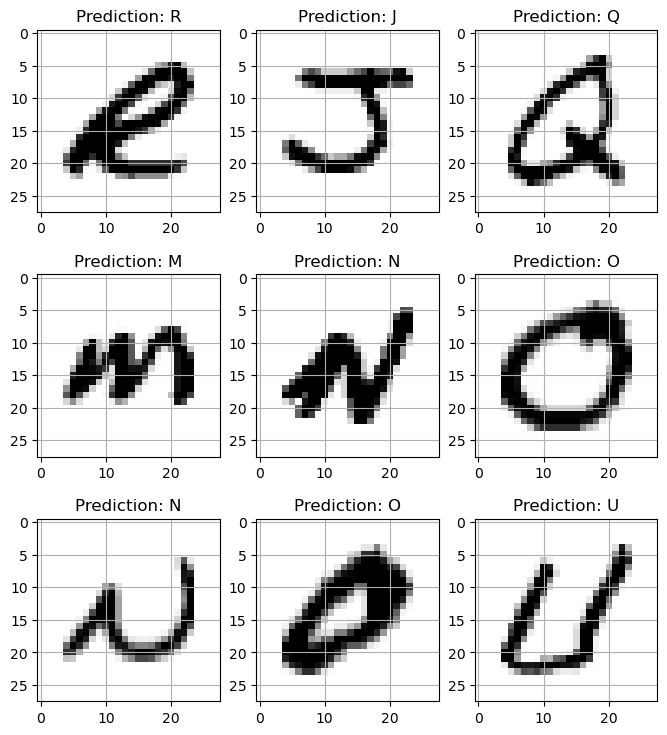

In [13]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
img = cv2.imread(r'B.jpeg')

img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (500,500))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]

#cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,40), cv2.FONT_HERSHEY_TRIPLEX, 1.3, color = (0,0,230))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

cv2.waitKey(0)
    
cv2.destroyAllWindows()